# Investigate the ADOS sample
- age
- site
- motion
- sex

In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline

In [3]:
pheno_path = '/data1/abide/Pheno/full_merged_pheno.csv'

In [19]:
# Get pheno and drop anything that doesn't have ADOS
pheno = pd.read_csv(pheno_path)
mask_ados = ~np.isnan(pheno['ADOS_SOCOM_SEV'].values)
mask_control = pheno['DX_GROUP'].values == 2
ados = pheno[mask_ados]
control = pheno[mask_control]

## Age and Site distribution

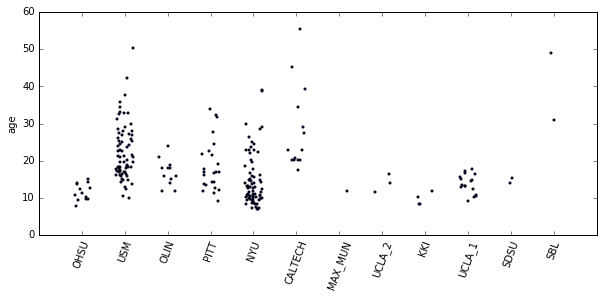

In [5]:
# Group by site
grouped = ados.groupby('SITE_ID')
site_names = grouped.groups.keys()
n_sites = len(site_names)

all_ages = [grouped.get_group(st)['AGE_AT_SCAN'].values for st in site_names]

f = plt.figure(figsize=(10,4))
ax = f.add_subplot(111)
for idx, ages in enumerate(all_ages):
    site_name = site_names[idx]
    l_ages = len(ages)
    ind = np.ones((l_ages,))*idx+1
    jitter = (np.random.random(l_ages,)*2-1)*0.2
    ind += jitter
    tmp = ax.scatter(ind, ages, s=4)
tmp = ax.set_xticks(np.arange(len(all_ages))+1)
tmp = ax.set_xticklabels(site_names, rotation=70)
tmp = ax.set_xlim([0,len(all_ages)+1])
tmp = ax.set_ylabel('age')

In [14]:
drop_sites = ['MAX_MUN', 'UCLA_2', 'KKI', 'SDSU', 'SBL']
keep_sites = ['USM', 'PITT', 'NYU', '']
mask_site = [row['SITE_ID'] in keep_sites for index, row in ados.iterrows()]
ados_reduced = ados[mask_site]

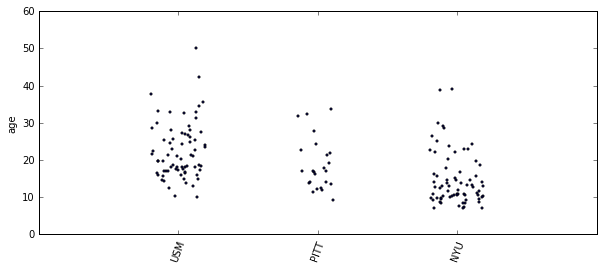

In [15]:
# Group by site
grouped = ados_reduced.groupby('SITE_ID')
site_names = grouped.groups.keys()
n_sites = len(site_names)

all_ages = [grouped.get_group(st)['AGE_AT_SCAN'].values for st in site_names]

f = plt.figure(figsize=(10,4))
ax = f.add_subplot(111)
for idx, ages in enumerate(all_ages):
    site_name = site_names[idx]
    l_ages = len(ages)
    ind = np.ones((l_ages,))*idx+1
    jitter = (np.random.random(l_ages,)*2-1)*0.2
    ind += jitter
    tmp = ax.scatter(ind, ages, s=4)
tmp = ax.set_xticks(np.arange(len(all_ages))+1)
tmp = ax.set_xticklabels(site_names, rotation=70)
tmp = ax.set_xlim([0,len(all_ages)+1])
tmp = ax.set_ylabel('age')

In [16]:
len(ados_reduced)

168

In [9]:
ados.columns

Index([u'SITE_ID', u'SUB_ID', u'DX_GROUP', u'DSM_IV_TR', u'AGE_AT_SCAN',
       u'SEX', u'HANDEDNESS_CATEGORY', u'HANDEDNESS_SCORES', u'FIQ', u'VIQ',
       u'PIQ', u'FIQ_TEST_TYPE', u'VIQ_TEST_TYPE', u'PIQ_TEST_TYPE',
       u'ADI_R_SOCIAL_TOTAL_A', u'ADI_R_VERBAL_TOTAL_BV', u'ADI_RRB_TOTAL_C',
       u'ADI_R_ONSET_TOTAL_D', u'ADI_R_RSRCH_RELIABLE', u'ADOS_MODULE',
       u'ADOS_TOTAL', u'ADOS_COMM', u'ADOS_SOCIAL', u'ADOS_STEREO_BEHAV',
       u'ADOS_RSRCH_RELIABLE', u'ADOS_GOTHAM_SOCAFFECT', u'ADOS_GOTHAM_RRB',
       u'ADOS_GOTHAM_TOTAL', u'ADOS_GOTHAM_SEVERITY', u'SRS_VERSION',
       u'SRS_RAW_TOTAL', u'SRS_AWARENESS', u'SRS_COGNITION',
       u'SRS_COMMUNICATION', u'SRS_MOTIVATION', u'SRS_MANNERISMS',
       u'SCQ_TOTAL', u'AQ_TOTAL', u'COMORBIDITY', u'CURRENT_MED_STATUS',
       u'MEDICATION_NAME', u'OFF_STIMULANTS_AT_SCAN',
       u'VINELAND_RECEPTIVE_V_SCALED', u'VINELAND_EXPRESSIVE_V_SCALED',
       u'VINELAND_WRITTEN_V_SCALED', u'VINELAND_COMMUNICATION_STANDARD',
       u'V

In [13]:
ados['ADOS_SOCOM_SEV'].values

array([ 6.,  4.,  9.,  6.,  7.,  9.,  9.,  7.,  8.,  5.,  6.,  4.,  8.,
        7.,  7.,  7.,  8.,  6.,  4.,  8.,  8.,  7.,  8.,  7.,  3.,  3.,
        3.,  4.,  6.,  8.,  9.,  3.,  6.,  5.,  5.,  6.,  3.,  8.,  6.,
        9.,  7.,  6.,  7.,  5.,  5.,  7.,  5.,  6.,  8.,  8.,  9.,  9.,
        9.,  4.,  7.,  5.,  7.,  2.,  8.,  8.,  9.,  6.,  7.,  5.,  6.,
        4.,  4.,  7.,  6.,  4.,  6.,  3.,  6.,  2.,  6.,  7.,  5.,  5.,
        6.,  4.,  7.,  8.,  2.,  5.,  8.,  6.,  7.,  5.,  9.,  4.,  6.,
        5.,  7.,  8.,  5.,  3.,  3.,  6.,  3.,  7.,  5.,  6.,  7.,  7.,
        9.,  9.,  7.,  7.,  9.,  9.,  7.,  6.,  3.,  2.,  4.,  9.,  6.,
        6.,  8.,  6.,  9.,  8.,  5.,  7.,  6.,  7.,  8.,  9.,  5.,  7.,
        6.,  5.,  4.,  7.,  7.,  7.,  5.,  4.,  4.,  4.,  6.,  6.,  9.,
        7.,  2.,  2.,  8.,  4.,  7.,  7.,  7.,  5.,  6.,  8.,  4.,  3.,
        6.,  4.,  7.,  7.,  7.,  6.,  7.,  7.,  2.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  3.,  1

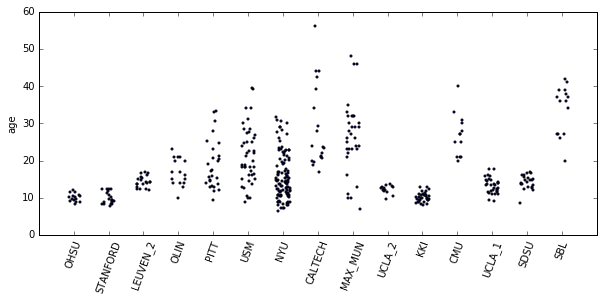

In [21]:
# Group by site
grouped = control.groupby('SITE_ID')
site_names = grouped.groups.keys()
n_sites = len(site_names)

all_ages = [grouped.get_group(st)['AGE_AT_SCAN'].values for st in site_names]

f = plt.figure(figsize=(10,4))
ax = f.add_subplot(111)
for idx, ages in enumerate(all_ages):
    site_name = site_names[idx]
    l_ages = len(ages)
    ind = np.ones((l_ages,))*idx+1
    jitter = (np.random.random(l_ages,)*2-1)*0.2
    ind += jitter
    tmp = ax.scatter(ind, ages, s=4)
tmp = ax.set_xticks(np.arange(len(all_ages))+1)
tmp = ax.set_xticklabels(site_names, rotation=70)
tmp = ax.set_xlim([0,len(all_ages)+1])
tmp = ax.set_ylabel('age')